# Data Exploration of the Titanic Dataset

- The goal is to prepare the data and develop a lightweight machine learning model that will be used to predict Survival outcomes for the test set, which will be submitted to the Kaggle competition as well as building a base model for the streamlit app

- For modelling, I will choose one of the lightweight models (likely decision tree based) since it will be easier for the deployment of the streamlit app + provide easy-to-understand insights to the users of the app into what factors influence their survival rate

Import Libraries:

In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Handle the file paths:

In [36]:
# Get the current working directory (where Jupyter Notebook is running)
notebook_dir = os.getcwd()

# Move up one level to get the root directory of the project
root_dir = os.path.dirname(notebook_dir)  # Moves up from `notebook_dir` to `project root`

# Construct paths for train and test CSV files
train_file_path = os.path.join(root_dir, "data/train.csv")
test_file_path = os.path.join(root_dir, "data/test.csv")

Load the train and test data
- The test data is downloaded from the Kaggle competition, and does not include actual Survival lables, so we will need to work with train data and do the validation on it
- After selecting the optimal model, I will submit my results to the competition as well as using the model for the Streamlit App

In [37]:
# Load the data
train_data = pd.read_csv(train_file_path)

test_data = pd.read_csv(test_file_path)

## Data Exploration

In [38]:
train_data.shape

(891, 12)

The train dataset has 891 rows and 12 columns

In [39]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [42]:
# Create df with all missing values (train in first column, test in second column)

missing_data = pd.DataFrame({'train_missing': train_data.isnull().sum(), 'test_missing': test_data.isnull().sum()})

print(missing_data)



             train_missing  test_missing
Age                    177          86.0
Cabin                  687         327.0
Embarked                 2           0.0
Fare                     0           1.0
Name                     0           0.0
Parch                    0           0.0
PassengerId              0           0.0
Pclass                   0           0.0
Sex                      0           0.0
SibSp                    0           0.0
Survived                 0           NaN
Ticket                   0           0.0


In [43]:
train_data[train_data['Fare'] < 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S


Looking at the Fare variable
- some of the observations are 0, which most likely indicates workers
- I will exclude the workers from the analysis since the primary goal is to build the streamlit app that would tell individuals whether they would survive or not. And I assume non of the individuals would act as potential workers on the ship, but rather potential passangers
- Another way to go about this would be to give user an option of selecting a ticket for the worker on the ship (might be great for future update of the app)

In [44]:
train_data.duplicated().sum()

np.int64(0)

In [45]:
unique_counts = train_data.nunique()

unique_counts

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [46]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

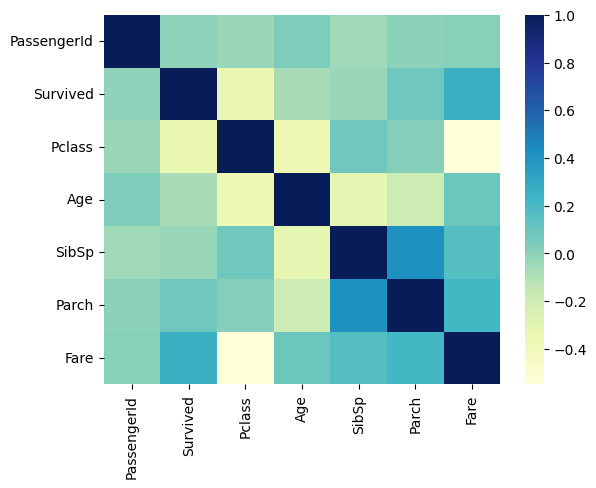

In [47]:
# Correlation plot

import seaborn as sns

sns.heatmap(train_data.corr(numeric_only=True), cmap="YlGnBu")

plt.show()

In [48]:
#quick way to separate numeric columns
train_data.describe().columns

# look at numeric and categorical values separately 
df_num = train_data[['Age','SibSp','Parch','Fare']]


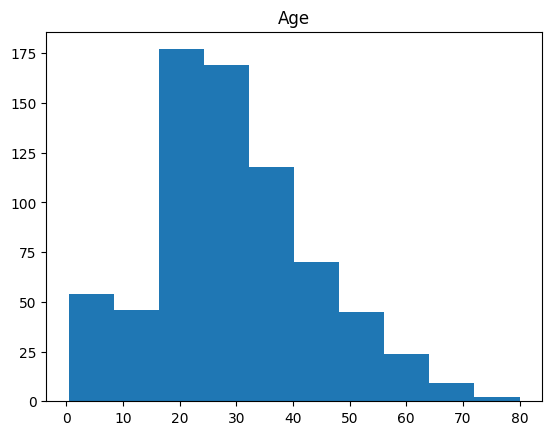

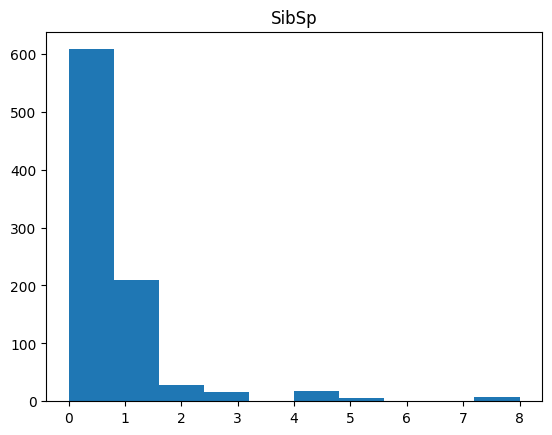

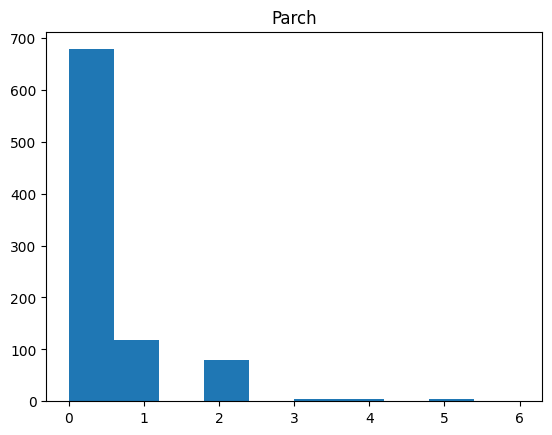

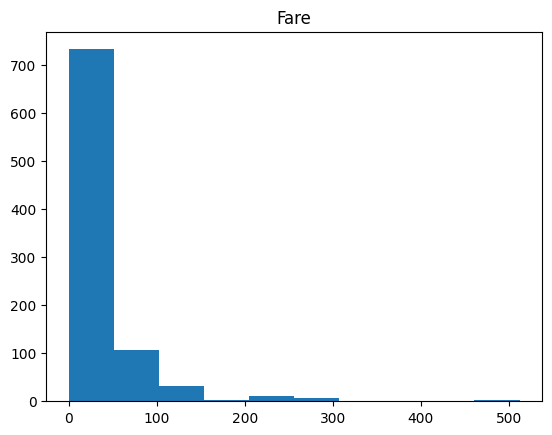

In [49]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Now, I want to check the Class combinations with Fare to come up with some pricing strategies for the ticket in the app
- first I will drop some of the unwanted observations before looking into the stats for fare and class

In [50]:
class_data = train_data[train_data["Embarked"].notna()]

class_data = train_data[train_data['Fare'].notna() & (train_data['Fare'] > 0)]

pclass_fare_stats = class_data.groupby('Pclass')['Fare'].describe()
print(pclass_fare_stats)

        count       mean        std      min      25%      50%      75%  \
Pclass                                                                    
1       211.0  86.148874  78.212155   5.0000  32.9104  61.9792  99.9625   
2       178.0  21.358661  13.083169  10.5000  13.0000  15.0229  26.0000   
3       487.0  13.787875  11.760718   4.0125   7.7500   8.0500  15.5000   

             max  
Pclass            
1       512.3292  
2        73.5000  
3        69.5500  


I decided to set the prices in a way that there is no overlap between the classes - most expensive ticket in class is still cheaper than the cheapest ticket in the class above

In the UI, I will have distinct price tiers, which simplifies user choices and predictions, and makes the experience more realistic

In [51]:

ticket_prices = {
    (1, "Budget"): 100,
    (1, "Standard"): 150,
    (1, "Premium"): 250,
    (1, "Luxury"): 500,
    (2, "Budget"): 30,
    (2, "Standard"): 50,
    (2, "Premium"): 70,
    (2, "Luxury"): 80,
    (3, "Budget"): 5,
    (3, "Standard"): 12,
    (3, "Premium"): 20,
    (3, "Luxury"): 25,
}

ticket_prices

{(1, 'Budget'): 100,
 (1, 'Standard'): 150,
 (1, 'Premium'): 250,
 (1, 'Luxury'): 500,
 (2, 'Budget'): 30,
 (2, 'Standard'): 50,
 (2, 'Premium'): 70,
 (2, 'Luxury'): 80,
 (3, 'Budget'): 5,
 (3, 'Standard'): 12,
 (3, 'Premium'): 20,
 (3, 'Luxury'): 25}

## Dataset Pre-Processing & Feature Engineering

Remove unwanted variables:
- Name, Ticket, Cabin

Missing Data:
- Dropped null values in ‘Embarked’
- Filled missing ‘Age’ based on ‘Pclass’ & ‘Sex’
- Removed rows with missing ‘Fare’ and ‘Fare’ = 0 (I assume the ones with Fare of 0 are the employees on the ship)

Creating new variables:
- Family size
- Economic status
- Single traveler

Lumping (will be beneficial especially for three based algorithms that I'm planning to use)
- Lump age group

Label Encoding
- apply to Categories (Sex, Embarked, Economic Status, Age-Groups). I will use manual mapping for this to have better control

One-hot Encoding
- not needed since I want to primarily run the Decision Tree based models


The way I want to handle the pre-processing is creating a class with methods that could be applied to both training, test set, and pseudo test set + Will be re-used in the architecture of the Streamlit app

In [52]:
class TitanicPreprocessor:
    def __init__(self):
        """Initialize mappings and placeholder for future attributes"""
        self.sex_mapping = {"male": 0, "female": 1}
        self.embarked_mapping = {"C": 0, "Q": 1, "S": 2}
        self.economic_status_mapping = {"Low": 0, "Middle": 1, "Wealthy": 2}
        self.age_group_mapping = {"Child": 0, "Teenager": 1, "Adult": 2, "Senior": 3}

    def _classify_status(
        self, row
    ):  # underscore is used to indicate that this method is private
        """Assign economic status based on Pclass & Fare."""
        if row["Pclass"] == 1 and row["Fare"] > 150:
            return "Wealthy"
        elif row["Pclass"] == 2 or (row["Pclass"] == 1 and row["Fare"] <= 150):
            return "Middle"
        else:
            return "Low"

    def _fill_missing_age(self, df):
        """Fill missing Age values using the median based on (Pclass, Sex) groups."""
        df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(
            lambda x: x.fillna(x.median())
        )
        return df

    def _categorize_age(self, age):
        if age <= 12:
            return "Child"
        elif age <= 19:
            return "Teenager"
        elif age <= 59:
            return "Adult"
        else:
            return "Senior"

    def _is_alone(self, row):
        """Determine if a passenger is traveling alone (family_size == 1)."""
        return 1 if row["family_size"] == 1 else 0

    def _manual_encode(self, df):
        """Apply manual mappings to categorical columns."""
        df["Sex"] = df["Sex"].map(self.sex_mapping)
        df["Embarked"] = df["Embarked"].map(self.embarked_mapping)
        df["economic_status"] = df["economic_status"].map(self.economic_status_mapping)
        df["age_group"] = df["age_group"].map(self.age_group_mapping)
        return df

    def transform(self, df):
        """Apply preprocessing steps to Titanic dataset."""

        # Drop unnecessary columns
        df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

        # Remove rows with missing Embarked
        df = df[df["Embarked"].notna()]

        # Remove rows where Fare is missing or 0
        df = df[df["Fare"].notna() & (df["Fare"] > 0)]

        # Fill missing Age values
        df = self._fill_missing_age(df)

        # Create family size feature
        df["family_size"] = df["SibSp"] + df["Parch"] + 1

        # Create is_alone feature
        df["is_alone"] = df.apply(self._is_alone, axis=1)

        # Assign economic status
        df["economic_status"] = df.apply(self._classify_status, axis=1)

        # Categorize Age
        df["age_group"] = df["Age"].apply(self._categorize_age)

        # Apply manual mappings
        df = self._manual_encode(df)

        # Drop columns that are not needed anymore
        df = df.drop(["SibSp", "Parch"], axis=1)

        # Standardize column names
        column_renaming = {
            "Survived": "survived",
            "Pclass": "class",
            "Sex": "sex",
            "Age": "age",
            "Fare": "fare",
            "Embarked": "embarked",
            "family_size": "family_size",
            "is_alone": "is_alone",
            "economic_status": "economic_status",
            "age_group": "age_group",
        }

        df = df.rename(columns=column_renaming)

        # Reset index
        df = df.reset_index(drop=True)

        return df  # Return the modified DataFrame



In [53]:
# Initialize the preprocessor
preprocessor = TitanicPreprocessor()

# Apply preprocessing to train and test data
train_processed = preprocessor.transform(train_data)

test_processed = preprocessor.transform(test_data)

In [54]:
train_processed.head()

,PassengerId,survived,class,sex,age,fare,embarked,family_size,is_alone,economic_status,age_group
0,1,0,3,0,22.0,7.2500,2,2,0,0,2
1,2,1,1,1,38.0,71.2833,0,2,0,1,2
2,3,1,3,1,26.0,7.9250,2,1,1,0,2
3,4,1,1,1,35.0,53.1000,2,2,0,1,2
4,5,0,3,0,35.0,8.0500,2,1,1,0,2


In [55]:
test_processed.head()

,PassengerId,class,sex,age,fare,embarked,family_size,is_alone,economic_status,age_group
0,892,3,0,34.5,7.8292,1,1,1,0,2
1,893,3,1,47.0,7.0000,2,2,0,0,2
2,894,2,0,62.0,9.6875,1,1,1,1,3
3,895,3,0,27.0,8.6625,2,1,1,0,2
4,896,3,1,22.0,12.2875,2,3,0,0,2


The data looks good for next steps, so let's proceed with modeling

# Modeling

First of all, we need to take the train data, and split it up into training and pseudo-test set to pick the best model based on out of sample performance - this is done to avoid overfitting

- For the split, I decided to use stratified sampling, which means the data in both training and test will follow the same distribution relative to important variables (Survived, Class and Sex)

- We will have to apply the split to the original data, and they use the ProProcessing class to process the data again since we are using computation of median to fill in the missing values - this introduces bias known as Data Leakage - basically information from our training set is leaking into test set by computing the median across the full data. So, that's why we have to do the PreProcessing exercise on more time

For model training I decided to do Cross-validation to get more accuracte Accuracy estimates and to fine-tune hyper-parameters. During the process, I tried variety of Cross Validation grids - from super complex (training wide ranges of multiple hyper-parameters) to simple (training small ranges of few parameters). I observed that the simpler models perform much better on the tests sets, therefore the cross-validation is kept to fine-tuned few hyper-parameters in relatively small ranges

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # We can apply random state to make the split reproducible

for train_indicies, test_indicies in split.split(train_data, train_data[['Survived', 'Pclass', 'Sex']]): # Here we have to use the original names for the variables
    strat_train_set = train_data.loc[train_indicies]
    strat_test_set = train_data.loc[test_indicies]

In [57]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S


This seems about correct, let's double check with some plots

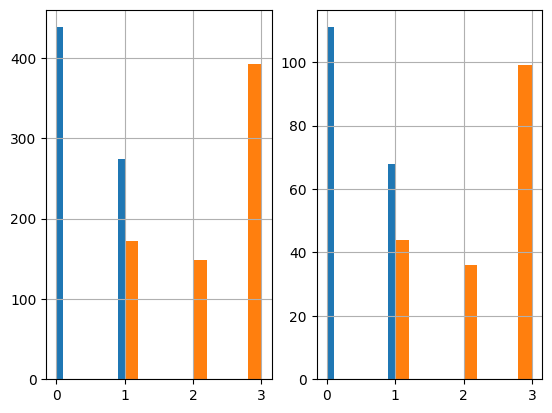

In [58]:
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot

strat_train_set['Survived'].hist()

strat_train_set['Pclass'].hist()


plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
strat_test_set['Survived'].hist()

strat_test_set['Pclass'].hist()


plt.show()

The distribution of Survived and Class look similar for both train, test

In [59]:
# Create proportion tables for the original data and the stratified data for Gender

print(strat_train_set['Sex'].value_counts() / len(strat_train_set))

print(strat_test_set['Sex'].value_counts() / len(strat_test_set))

Sex
male      0.648876
female    0.351124
Name: count, dtype: float64
Sex
male      0.642458
female    0.357542
Name: count, dtype: float64


Similar distribution of gender across both train and test

Now, we apply the pre-processing

In [60]:
# Apply preprocessing to train and test data
strat_train_processed = preprocessor.transform(strat_train_set)

strat_test_processed = preprocessor.transform(strat_test_set)

In [61]:
strat_train_processed.head()

strat_train_processed = strat_train_processed.drop('PassengerId', axis=1)

strat_test_processed = strat_test_processed.drop('PassengerId', axis=1)

In [62]:
strat_train_processed.head()

,survived,class,sex,age,fare,embarked,family_size,is_alone,economic_status,age_group
0,0,1,0,31.0,50.4958,2,1,1,1,2
1,0,2,0,26.0,10.5000,2,1,1,1,2
2,0,3,0,7.0,39.6875,2,6,0,0,0
3,1,3,0,30.0,9.5000,2,1,1,0,2
4,0,3,0,18.0,8.3000,2,1,1,0,1


Now, preparing X and Y subsets for the models

In [63]:
# ---- Separate Features (X) and Target Variable (Y) ----
x_train = strat_train_processed.drop(columns=['survived'])  # Features
y_train = strat_train_processed['survived']  # Target variable

x_test = strat_test_processed.drop(columns=['survived'])
y_test = strat_test_processed['survived']

# ---- Dictionary to Store Model Performances ----
model_performance = {}

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Decision Tree Classifier

Cross-Validation for Hyperparameter tuning

In [134]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': np.arange(3, 30, 1),
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=10, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)

best_params = grid_search_dt.best_params_ # Saving as dictionary

print(best_params['max_depth'])

3


Running the model with fine-tuned parameter

In [135]:
dt_model_fine_tuned = DecisionTreeClassifier(max_depth=best_params['max_depth'], random_state=42)

dt_model_fine_tuned.fit(x_train, y_train)
y_pred_dt = dt_model_fine_tuned.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(dt_accuracy)
model_performance["Decision Tree"] = dt_accuracy

0.8228571428571428


### Random Forest Classifier

In [136]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": np.arange(1, 15, 1),
}

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=10, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

rf_best_params = grid_search_rf.best_params_  # Saving as dictionary

cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)

print(rf_best_params['max_depth'])
print(rf_best_params['n_estimators'])

8
50


In [137]:
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'], max_depth=rf_best_params['max_depth'], random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(rf_accuracy)
model_performance["Random Forest"] = rf_accuracy

0.8285714285714286


### XGBoost Classifier
- didn't use cross-validation as I couldn't get the sklearn grid to work with xgboost library

In [149]:
xgb_model = XGBClassifier(max_depth=3, n_estimators=50, eval_metric="logloss", random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(xgb_accuracy)
model_performance["XGBoost"] = xgb_accuracy

0.8114285714285714


Model Performance

In [155]:
print("Model Performance:")
for model, accuracy in model_performance.items():
    print(f"{model}: {accuracy:.4f}")

Model Performance:
Decision Tree: 0.8229
Random Forest: 0.8286
XGBoost: 0.8114


I will generate results for all models and submit it to the Kaggle competition, and elaborate on the results. 

So far, I would use Decision Tree as the final model since it has decent performance, and low complexity - this is perfect since i want to use lightweight model with fairly good performance for the Streamlit app

The 